# **`Experiment 6: Numerical Optimization Using Gradient Descent Method`**

In [2]:
# imporing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

### The equation is
$$
f(x,y) = x^2 - 2x + y^2 - 2y + 2
$$

### The Initial point is
$$
P_0 = (3,3)
$$


In [13]:
# Defining the function to be minimized
f = lambda x, y: x**2 - 2*x + y**2 - 2*y + 2

In [6]:
# The initial point is
initial_point = [3,3]

# 1. *Using SCipy*

In [14]:
# the result of the optimization
result = minimize(lambda x: f(x[0], x[1]), initial_point, method='BFGS')

In [20]:
print("The result of the optimization is:")
print("x:", round(result.x[0]))
print("y:", round(result.x[1]))
print("f(x,y):", f(result.x[0], result.x[1]))


The result of the optimization is:
x: 1
y: 1
f(x,y): 0.0


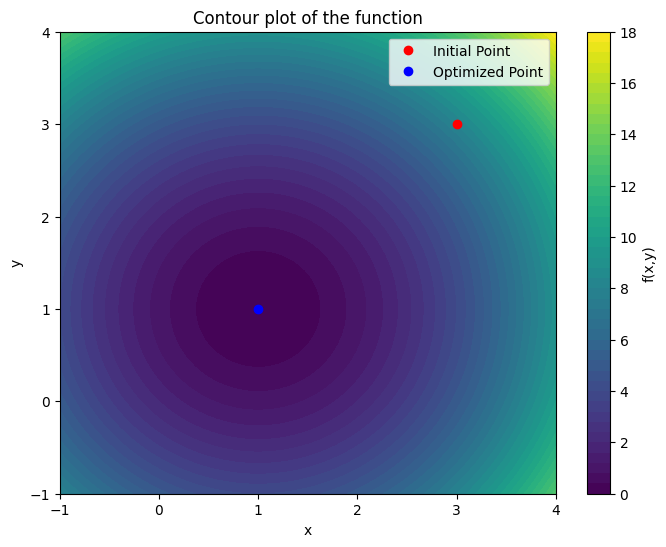

In [21]:
# Creating a grid of points
x = np.linspace(-1, 4, 100)
y = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
# Plotting the function
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='f(x,y)')
# Plotting the initial point
plt.plot(initial_point[0], initial_point[1], 'ro', label='Initial Point')
# Plotting the result of the optimization
plt.plot(result.x[0], result.x[1], 'bo', label='Optimized Point')
plt.title('Contour plot of the function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 2. *Using a written algorithm*

In [25]:
import numpy as np

def f(x, y):
    """Function to minimize"""
    return x**2 - 2*x + y**2 - 2*y + 2

def gradient(x, y):
    """Gradient of the function"""
    df_dx = 2*x - 2  # Partial derivative with respect to x
    df_dy = 2*y - 2  # Partial derivative with respect to y
    return np.array([df_dx, df_dy])

def gradient_descent(initial_point, learning_rate=0.1, max_iter=1000, tol=1e-6):
    """
    Gradient descent optimization algorithm
    
    Parameters:
    - initial_point: Starting point [x, y]
    - learning_rate: Step size multiplier
    - max_iter: Maximum number of iterations
    - tol: Tolerance for stopping criterion
    
    Returns:
    - history: List of visited points
    - values: List of function values at each point
    """
    current_point = np.array(initial_point, dtype=float)
    history = [current_point.copy()]
    values = [f(*current_point)]
    
    for i in range(max_iter):
        grad = gradient(*current_point)
        new_point = current_point - learning_rate * grad
        
        # Store the results
        history.append(new_point.copy())
        values.append(f(*new_point))
        
        # Check for convergence
        if np.linalg.norm(new_point - current_point) < tol:
            break
            
        current_point = new_point
    
    return history, values

# Run gradient descent
initial_point = [3, 3]
history, values = gradient_descent(initial_point, learning_rate=0.1)

# Print results
print(f"Initial point: {initial_point}")
print(f"Final point: {history[-1].round(3)}")
print(f"Minimum value: {values[-1]:.6f}")
print(f"Number of iterations: {len(history)-1}")

Initial point: [3, 3]
Final point: [1. 1.]
Minimum value: 0.000000
Number of iterations: 61
